In [1]:
from random import uniform
from math import sqrt
from time import time
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool 
import ipyparallel as ipp
from ipyparallel import Client

In [2]:
def throw_dart(darts_number):
    from random import uniform
    from math import sqrt
    number_of_darts = darts_number
    number_of_darts_in_circle = 0
    for n in range(number_of_darts):
        x, y = uniform(0, 1), uniform(0, 1)
        if sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
            number_of_darts_in_circle += 1
    return number_of_darts_in_circle

def pi_multiprocess(darts_number):
    start_time = time()
    darts_sum = 0
    pool = Pool(processes=4)
    multiple_results = [pool.apply_async(throw_dart, (int(darts_number/4),)) for i in range(4)]
    for res in multiple_results:
        darts_sum += res.get()
    end_time = time()
    execution_time = end_time - start_time
    pi_approx = 4 * darts_sum / float(darts_number)
    rate = darts_number / execution_time
    del pool
    return execution_time, rate

def pi_simple(darts_number):
    start_time = time()
    number_of_darts_in_circle = throw_dart(darts_number)
    end_time = time()
    execution_time = end_time - start_time
    pi_approx = 4 * number_of_darts_in_circle / float(darts_number)
    rate = darts_number / execution_time    
    return execution_time, rate

def pi_ipycluster(darts_number):
    start_time = time()
    darts_sum = 0
    rc = Client()
    multiple_results = rc[:].apply_async(throw_dart, int(darts_number/4))
    for res in multiple_results:
        darts_sum += res
    end_time = time()
    execution_time = end_time - start_time
    pi_approx = 4 * darts_sum / float(darts_number)
    rate = darts_number / execution_time
    rc.close()
    return execution_time, rate


In [3]:
number_list = np.logspace(1, 7, num=7, base=10)
sim_time = []
sim_rate = []
mp_time = []
mp_rate = []
ipy_time = []
ipy_rate = []
for i in number_list:
    i_sim_time, i_sim_rate = pi_simple(int(i))
    sim_time.append(i_sim_time)
    sim_rate.append(i_sim_rate)
    i_mp_time, i_mp_rate = pi_multiprocess(int(i))
    mp_time.append(i_mp_time)
    mp_rate.append(i_mp_rate)
    i_ipy_time, i_ipy_rate = pi_ipycluster(int(i))
    ipy_time.append(i_ipy_time)
    ipy_rate.append(i_ipy_rate)

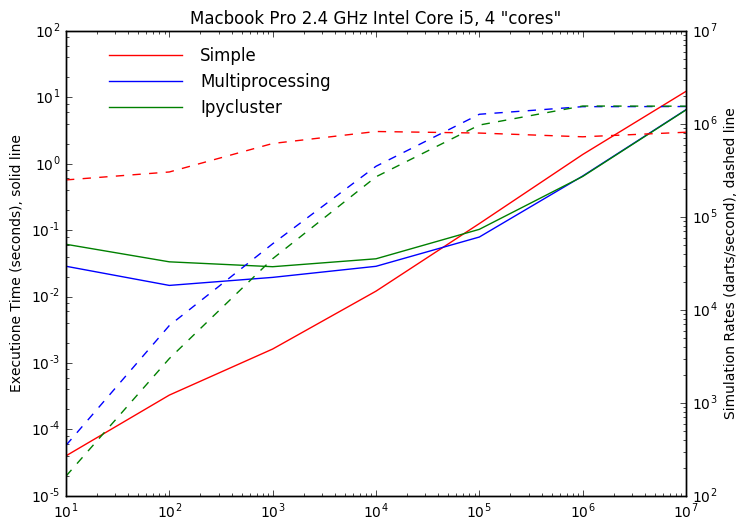

In [4]:
fig, ax1 = plt.subplots(1,1, figsize = (8,6))
ax1.set_title('Macbook Pro 2.4 GHz Intel Core i5, 4 "cores"')
ax1.plot(number_list, sim_time, color = 'red', label = 'Simple')
ax1.plot(number_list, mp_time, color = 'blue', label = 'Multiprocessing')
ax1.plot(number_list, ipy_time, color = 'green', label = 'Ipycluster')
ax1.legend(loc=(0.05, 0.8), frameon = False, handlelength = 5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Executione Time (seconds), solid line')
#ylabs = [pow(10,i) for i in range(-5,2)]
#ax1.set_yticklabels(ylabs)
#ax1.set_yticks(ylabs)
#ax1.set_xlim(10, 1000000)
#ax1.set_ylim(0.000, 100)
ax2 = ax1.twinx()
ax2.plot(number_list, sim_rate, ls = 'dashed', color = 'red')
ax2.plot(number_list, mp_rate, ls = 'dashed', color = 'blue')
ax2.plot(number_list, ipy_rate, ls = 'dashed', color = 'green')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('Simulation Rates (darts/second), dashed line')
ax2.set_ylim(1e2, 1e7)
plt.show()